In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
# load data
# due to sensivity of the dataset, it is not included in the data repository
# please download from brightspace
data = pd.read_csv('Data_IER_2022.csv', delimiter=',', encoding='latin1', na_values='NA', index_col='ID')

In [3]:
# take a look at the data
data.head()

,year,gender,bmi,living,stap_est,erv_fa_sub1_q,erv_fa_sub2_q,erv_fa,dag_zwa1,tijd_zwa1_uur,...,ipaqtot2,tijd_zit2_uur,tijd_zit2_min,wear_1,wear_2,wear_3,wear_4,wear_5,wear_6,wear_7
ID,,,,,,,,,,,,,,,,,,,,,
1,2019,Female,18.0,Moved_out,NaN,3.0,2.0,2.5,2.0,2.0,...,NaN,7.0,30.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,2019,Female,24.9,Moved_out,5000.0,1.0,2.0,1.5,0.0,NaN,...,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,2019,Female,21.8,Moved_out,6500.0,6.0,2.0,4.0,2.0,1.0,...,9795.0,9.0,NaN,Yes,Yes,No,Yes,No,Yes,Yes
4,2019,Female,18.7,Living_with_parents,5000.0,1.0,2.0,1.5,1.0,1.0,...,744.0,10.0,NaN,Yes,Yes,Yes,No,Yes,Yes,Yes
5,2019,Male,27.8,Living_with_parents,NaN,7.0,7.0,7.0,5.0,2.0,...,NaN,4.0,NaN,No,No,No,No,Yes,Yes,Yes


In [4]:
# print some info of the data
data.info()
print("The shape of the data is", data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 290
Columns: 102 entries, year to wear_7
dtypes: float64(70), int64(1), object(31)
memory usage: 233.4+ KB
The shape of the data is (290, 102)


In [5]:
# print some descriptive statistics
data.describe()

,year,bmi,stap_est,erv_fa_sub1_q,erv_fa_sub2_q,erv_fa,dag_zwa1,tijd_zwa1_uur,tijd_zwa1_min,dag_mat1,...,tijd_zwa2_min,dag_mat2,tijd_mat2_uur,tijd_mat2_min,dag_wan2,tijd_wan2_uur,tijd_wan2_min,ipaqtot2,tijd_zit2_uur,tijd_zit2_min
count,290.000000,278.000000,264.000000,286.000000,286.000000,286.000000,285.000000,227.000000,197.000000,284.000000,...,142.000000,268.000000,203.000000,198.000000,268.000000,176.000000,216.000000,240.000000,259.000000,122.000000
mean,2020.010345,21.258957,5763.121212,4.129371,4.006993,4.068182,2.014035,1.211454,19.269036,4.753521,...,21.330986,4.373134,1.583744,22.358586,4.022388,1.346591,23.226852,3272.776667,7.783784,7.270492
std,0.812891,2.331746,2146.115991,1.646062,1.489126,1.440541,1.482223,0.769583,15.218266,1.876719,...,15.095310,2.034061,4.788123,14.401343,2.192826,3.799141,12.856974,3223.598739,3.245684,13.581731
min,2019.000000,16.600000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,19.700000,5000.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,3.000000,...,0.000000,3.000000,0.000000,15.000000,2.000000,0.000000,15.000000,1428.000000,6.000000,0.000000
50%,2020.000000,21.000000,6000.000000,4.000000,4.000000,4.000000,2.000000,1.000000,30.000000,5.000000,...,30.000000,5.000000,1.000000,30.000000,4.000000,0.000000,20.000000,2421.750000,7.000000,0.000000
75%,2021.000000,22.600000,7000.000000,5.000000,5.000000,5.000000,3.000000,1.000000,30.000000,6.000000,...,30.000000,6.000000,1.000000,30.000000,6.000000,1.000000,30.000000,3861.250000,9.000000,0.000000
max,2021.000000,32.000000,14000.000000,7.000000,7.000000,7.000000,7.000000,8.000000,50.000000,7.000000,...,60.000000,7.000000,50.000000,50.000000,7.000000,30.000000,50.000000,26640.000000,40.000000,45.000000


In [6]:
# print a list of the columns/features
print(data.columns)

Index(['year', 'gender', 'bmi', 'living', 'stap_est', 'erv_fa_sub1_q',
       'erv_fa_sub2_q', 'erv_fa', 'dag_zwa1', 'tijd_zwa1_uur',
       ...
       'ipaqtot2', 'tijd_zit2_uur', 'tijd_zit2_min', 'wear_1', 'wear_2',
       'wear_3', 'wear_4', 'wear_5', 'wear_6', 'wear_7'],
      dtype='object', length=102)


In [7]:
# here we do some more data preprocessing
# first we calculate the average number of steps necessary for 

data['stap_om_mean'] = (data['stap_om_1_aantal'] + data['stap_om_2_aantal'] + \
                        data['stap_om_3_aantal'] + data['stap_om_4_aantal'] + \
                        data['stap_om_5_aantal'] + data['stap_om_6_aantal'] + \
                        data['stap_om_7_aantal']) / 7

data['stap_app_mean'] = (data['stap_app_1_aantal'] + data['stap_app_2_aantal'] + \
                        data['stap_app_3_aantal'] + data['stap_app_4_aantal'] + \
                        data['stap_app_5_aantal'] + data['stap_app_6_aantal'] + \
                        data['stap_app_7_aantal']) / 7

# we only keep the data that we consider relevant 
# and discard the remaining columns

columns_to_keep = ['year', 'bmi', 'stap_est', 'erv_fa', 'ipaqtot1', 'attitu_tot', 'soc_omg_tot', 'ipaqtot2', 'stap_om_mean', 'stap_app_mean']

data = data[columns_to_keep]

In [8]:
# here we make a decision to handle the missing data
# we can either fill in NA values in a column with the median,
# or drop the NA samples that do not report an attitude & 
# perception score

data = data.fillna(data.median()) # UNCOMMENT THIS TO FILL MISSING VALUES WITH MEDIAN
# data = data.dropna(subset=['attitu_tot', 'erv_fa']) # UNCOMMENT THIS TO DROP SAMPLES WITH NO ATTITUDE/PERCEPTION SCORES

# show number on non-null samples per column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           290 non-null    int64  
 1   bmi            290 non-null    float64
 2   stap_est       290 non-null    float64
 3   erv_fa         290 non-null    float64
 4   ipaqtot1       290 non-null    float64
 5   attitu_tot     290 non-null    float64
 6   soc_omg_tot    290 non-null    float64
 7   ipaqtot2       290 non-null    float64
 8   stap_om_mean   290 non-null    float64
 9   stap_app_mean  290 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 24.9 KB


In [9]:
# check whether the columns have NaN values
print(data.isna().any().any())

False


In [10]:
data_clean = data[(np.abs(sp.stats.zscore(data.attitu_tot)) < 3)]
data_clean = data_clean[(np.abs(sp.stats.zscore(data_clean.erv_fa)) < 3)]

data_clean.to_csv('data_clean.csv')

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           288 non-null    int64  
 1   bmi            288 non-null    float64
 2   stap_est       288 non-null    float64
 3   erv_fa         288 non-null    float64
 4   ipaqtot1       288 non-null    float64
 5   attitu_tot     288 non-null    float64
 6   soc_omg_tot    288 non-null    float64
 7   ipaqtot2       288 non-null    float64
 8   stap_om_mean   288 non-null    float64
 9   stap_app_mean  288 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 24.8 KB


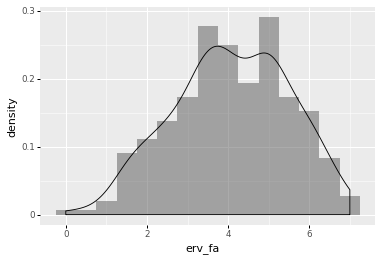

<ggplot: (672044819)>

In [11]:
ggplot(data_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

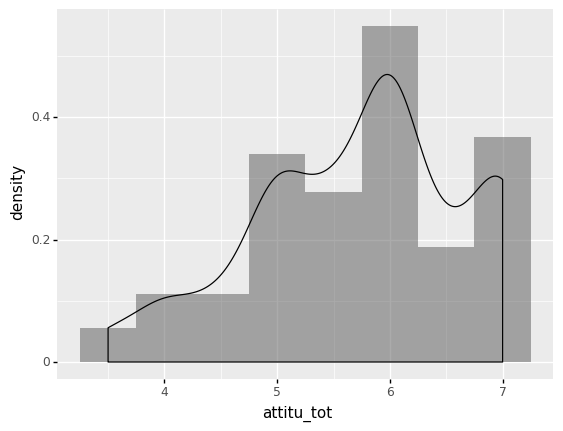

<ggplot: (672046737)>

In [12]:
ggplot(data_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

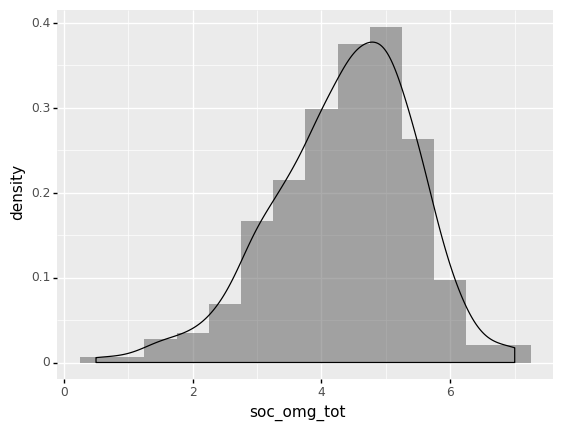

<ggplot: (672798160)>

In [13]:
ggplot(data_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

In [14]:
def check_normality(data):
    test_stat_normality, p_value_normality = sp.stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [15]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= sp.stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var < 0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")      

In [16]:
def hypothesis_test(group_1, group_2, group_3):
    test_stat_hypothesis, p_value_hypothesis = sp.stats.kruskal(group_1, group_2, group_3)
    print("p value: %.4f" % p_value_hypothesis)
    if p_value_hypothesis < 0.05:
        print("Reject null hypothesis >> The median score is equal across all groups")
    else:
        print("Fail to reject null hypothesis >> The median score is not equal across all groups")

In [17]:
print('Checking normality of the perception data')
check_normality(data_clean.erv_fa.to_numpy())
print()

print('Checking normality of the attitude data')
check_normality(data_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the social perception data')
check_normality(data_clean.soc_omg_tot.to_numpy())
print()

Checking normality of the perception data
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Checking normality of the social perception data
p value:0.0000
Reject null hypothesis >> The data is not normally distributed



In [18]:
data_2019_clean = data_clean[data_clean.year==2019]
data_2020_clean = data_clean[data_clean.year==2020]
data_2021_clean = data_clean[data_clean.year==2021]

In [19]:
# calculate the average samples per year
average_samples_per_year = np.array([data_2019_clean.index.size, data_2020_clean.index.size, data_2021_clean.index.size]).mean()
print("On average, there were", average_samples_per_year.round(2), "samples per year.")

On average, there were 96.0 samples per year.


In [20]:
# here we print some descriptive statistics of the perception scores per year

print('Perception statistics 2019')
print(data_2019_clean.erv_fa.describe())
print()

print('Perception statistics 2020')
print(data_2020_clean.erv_fa.describe())
print()

print('Perception statistics 2021')
print(data_2021_clean.erv_fa.describe())
print()

Perception statistics 2019
count    94.000000
mean      4.287234
std       1.496392
min       0.500000
25%       3.500000
50%       4.500000
75%       5.500000
max       7.000000
Name: erv_fa, dtype: float64

Perception statistics 2020
count    99.000000
mean      3.792929
std       1.360916
min       0.000000
25%       3.000000
50%       3.500000
75%       5.000000
max       6.500000
Name: erv_fa, dtype: float64

Perception statistics 2021
count    95.000000
mean      4.178947
std       1.383635
min       1.000000
25%       3.250000
50%       4.500000
75%       5.250000
max       7.000000
Name: erv_fa, dtype: float64



In [21]:
# here we print some descriptive statistics of the attitude scores per year

print('Attitude statistics 2019')
print(data_2019_clean.attitu_tot.describe())
print()

print('Attitude statistics 2020')
print(data_2020_clean.attitu_tot.describe())
print()

print('Attitude statistics 2021')
print(data_2021_clean.attitu_tot.describe())
print()

Attitude statistics 2019
count    94.000000
mean      5.829787
std       0.859961
min       3.500000
25%       5.000000
50%       6.000000
75%       6.500000
max       7.000000
Name: attitu_tot, dtype: float64

Attitude statistics 2020
count    99.000000
mean      5.570707
std       0.950322
min       3.500000
25%       5.000000
50%       5.500000
75%       6.000000
max       7.000000
Name: attitu_tot, dtype: float64

Attitude statistics 2021
count    95.000000
mean      5.789474
std       0.958109
min       3.500000
25%       5.000000
50%       6.000000
75%       6.500000
max       7.000000
Name: attitu_tot, dtype: float64



In [22]:
# here we print some descriptive statistics of the attitude scores per year

print('Social perception statistics 2019')
print(data_2019_clean.soc_omg_tot.describe())
print()

print('Social perception statistics 2020')
print(data_2020_clean.soc_omg_tot.describe())
print()

print('Social perception statistics 2021')
print(data_2021_clean.soc_omg_tot.describe())
print()

Social perception statistics 2019
count    94.000000
mean      4.526596
std       1.048212
min       1.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       7.000000
Name: soc_omg_tot, dtype: float64

Social perception statistics 2020
count    99.000000
mean      4.121212
std       1.115958
min       0.500000
25%       3.500000
50%       4.500000
75%       5.000000
max       6.000000
Name: soc_omg_tot, dtype: float64

Social perception statistics 2021
count    95.000000
mean      4.452632
std       1.067094
min       1.500000
25%       4.000000
50%       4.500000
75%       5.000000
max       7.000000
Name: soc_omg_tot, dtype: float64



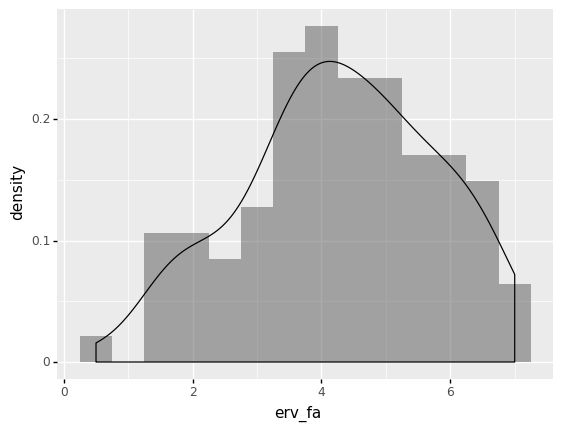

<ggplot: (672843966)>

In [23]:
ggplot(data_2019_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

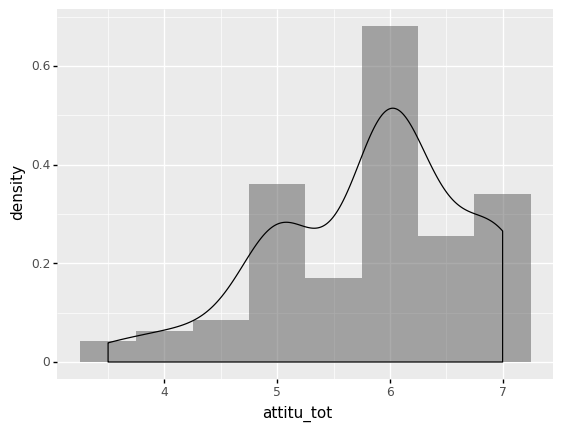

<ggplot: (672855209)>

In [24]:
ggplot(data_2019_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

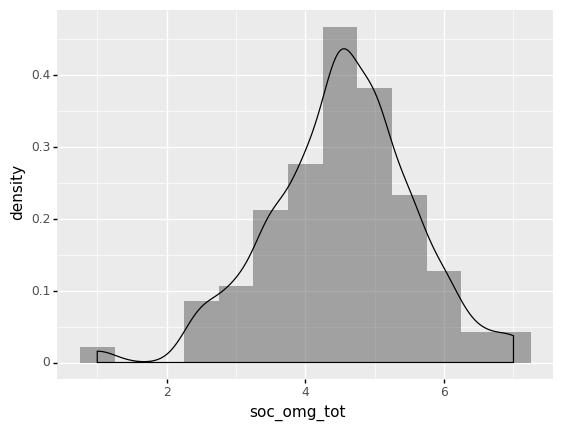

<ggplot: (672899705)>

In [25]:
ggplot(data_2019_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

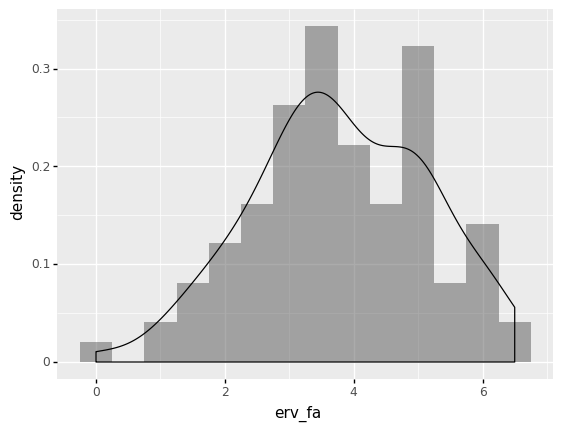

<ggplot: (672948595)>

In [26]:
ggplot(data_2020_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

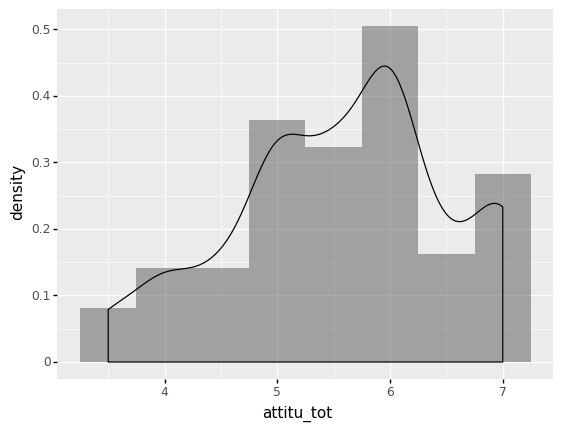

<ggplot: (672984239)>

In [27]:
ggplot(data_2020_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

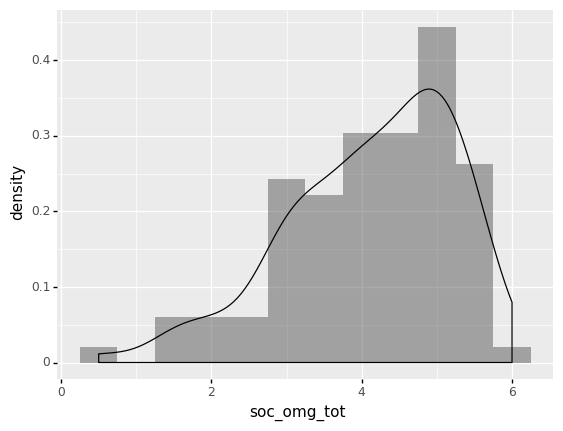

<ggplot: (673012571)>

In [28]:
ggplot(data_2020_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

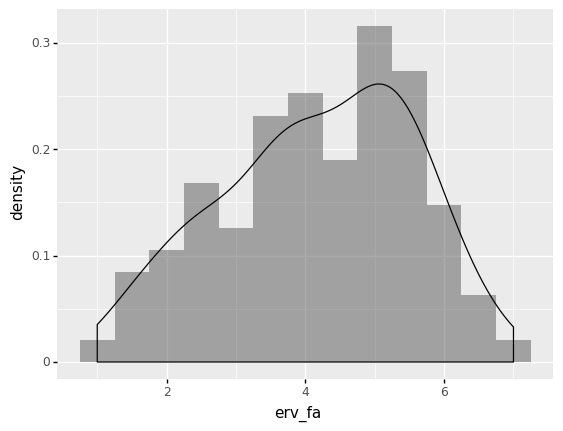

<ggplot: (672993503)>

In [29]:
ggplot(data_2021_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

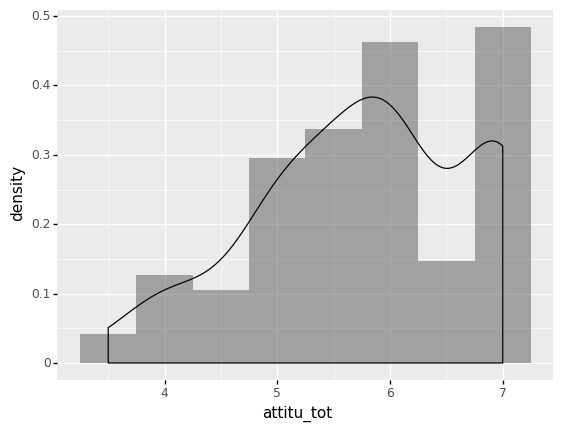

<ggplot: (673094148)>

In [30]:
ggplot(data_2021_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

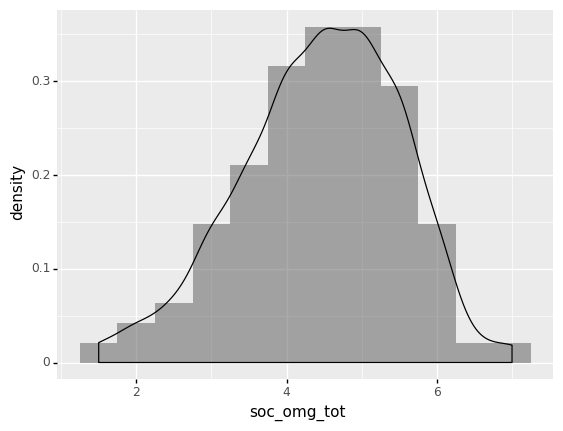

<ggplot: (673132002)>

In [31]:
ggplot(data_2021_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

In [32]:
print('PERCEPTION DATA')
print()

print('Checking normality of the perception data in 2019')
check_normality(data_2019_clean.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2020')
check_normality(data_2020_clean.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2021')
check_normality(data_2021_clean.erv_fa.to_numpy())
print()

print('ATTITUDE DATA')
print()

print('Checking normality of the attitude data in 2019')
check_normality(data_2019_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2020')
check_normality(data_2020_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2021')
check_normality(data_2021_clean.attitu_tot.to_numpy())
print()

print('SOCIAL PERCEPTION DATA')
print()

print('Checking normality of the social perception data in 2019')
check_normality(data_2019_clean.soc_omg_tot.to_numpy())
print()

print('Checking normality of the social perception data in 2020')
check_normality(data_2020_clean.soc_omg_tot.to_numpy())
print()

print('Checking normality of the social perception data in 2021')
check_normality(data_2021_clean.soc_omg_tot.to_numpy())
print()

PERCEPTION DATA

Checking normality of the perception data in 2019
p value:0.0573
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2020
p value:0.0883
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2021
p value:0.0165
Reject null hypothesis >> The data is not normally distributed

ATTITUDE DATA

Checking normality of the attitude data in 2019
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2020
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2021
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

SOCIAL PERCEPTION DATA

Checking normality of the social perception data in 2019
p value:0.0323
Reject null hypothesis >> The data is not normally distributed

Checking normality of the social

In [33]:
print('PERCEPTION DATA')

print('Checking variance homogeneity of the perception data in 2019 and 2020')
check_variance_homogeneity(data_2019_clean.erv_fa.to_numpy(), data_2020_clean.erv_fa.to_numpy())
print()

print('Checking variance homogeneity of the perception data in 2020 and 2021')
check_variance_homogeneity(data_2020_clean.erv_fa.to_numpy(), data_2021_clean.erv_fa.to_numpy())
print()

print('Checking variance homogeneity of the perception data in 2019 and 2021')
check_variance_homogeneity(data_2019_clean.erv_fa.to_numpy(), data_2021_clean.erv_fa.to_numpy())
print()

print('ATTITUDE DATA')
print()

print('Checking variance homogeneity of the attitude data in 2019 and 2020')
check_variance_homogeneity(data_2019_clean.attitu_tot.to_numpy(), data_2020_clean.attitu_tot.to_numpy())
print()

print('Checking variance homogeneity of the attitude data in 2020 and 2021')
check_variance_homogeneity(data_2020_clean.attitu_tot.to_numpy(), data_2021_clean.attitu_tot.to_numpy())
print()

print('Checking variance homogeneity of the attitude data in 2019 and 2021')
check_variance_homogeneity(data_2019_clean.attitu_tot.to_numpy(), data_2021_clean.attitu_tot.to_numpy())
print()

print('SOCIAL PERCEPTION DATA')
print()

print('Checking variance homogeneity of the social perception data in 2019 and 2020')
check_variance_homogeneity(data_2019_clean.soc_omg_tot.to_numpy(), data_2020_clean.soc_omg_tot.to_numpy())
print()

print('Checking variance homogeneity of the social perception data in 2020 and 2021')
check_variance_homogeneity(data_2020_clean.soc_omg_tot.to_numpy(), data_2021_clean.soc_omg_tot.to_numpy())
print()

print('Checking variance homogeneity of the social perception data in 2019 and 2021')
check_variance_homogeneity(data_2019_clean.soc_omg_tot.to_numpy(), data_2021_clean.soc_omg_tot.to_numpy())
print()

PERCEPTION DATA
Checking variance homogeneity of the perception data in 2019 and 2020
p value:0.3730
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the perception data in 2020 and 2021
p value:0.6670
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the perception data in 2019 and 2021
p value:0.6307
Fail to reject null hypothesis >> The variances of the samples are same.

ATTITUDE DATA

Checking variance homogeneity of the attitude data in 2019 and 2020
p value:0.1219
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the attitude data in 2020 and 2021
p value:0.9929
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the attitude data in 2019 and 2021
p value:0.1386
Fail to reject null hypothesis >> The variances of the samples are same.

SOCIAL PERCEPTION DAT

In [34]:
print('PERCEPTION DATA')
print()

# groups here are the perception scores per year
group_1 = data_2019_clean.erv_fa.to_numpy()
group_2 = data_2020_clean.erv_fa.to_numpy()
group_3 = data_2021_clean.erv_fa.to_numpy()

print('Testing  hypothesis of change in perception scores across years')
hypothesis_test(group_1, group_2, group_3)
print()

print('ATTITUDE DATA')
print()

# groups here are the perception scores per year
group_1 = data_2019_clean.attitu_tot.to_numpy()
group_2 = data_2020_clean.attitu_tot.to_numpy()
group_3 = data_2021_clean.attitu_tot.to_numpy()

print('Testing  hypothesis of change in attitude scores across years')
hypothesis_test(group_1, group_2, group_3)
print()

print('SOCIAL PERCEPTION DATA')
print()

# groups here are the perception scores per year
group_1 = data_2019_clean.soc_omg_tot.to_numpy()
group_2 = data_2020_clean.soc_omg_tot.to_numpy()
group_3 = data_2021_clean.soc_omg_tot.to_numpy()

print('Testing  hypothesis of change in attitude scores across years')
hypothesis_test(group_1, group_2, group_3)

PERCEPTION DATA

Testing  hypothesis of change in perception scores across years
p value: 0.0367
Reject null hypothesis >> The median score is equal across all groups

ATTITUDE DATA

Testing  hypothesis of change in attitude scores across years
p value: 0.1156
Fail to reject null hypothesis >> The median score is not equal across all groups

SOCIAL PERCEPTION DATA

Testing  hypothesis of change in attitude scores across years
p value: 0.0712
Fail to reject null hypothesis >> The median score is not equal across all groups
